### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'pr-SNL_MSU_DOE_lo-rmse_sp-random_va-True_ba-False_lr-003_we-002_ba-1024_se-False'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
Dataset size: 2371 790 792


### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/1000, Train loss: 3.5242, Val loss: 2.2204, Min val loss: 2.2204
Epoch: 100/1000, Train loss: 0.4578, Val loss: 0.5692, Min val loss: 0.5335
Epoch: 200/1000, Train loss: 0.3742, Val loss: 0.5451, Min val loss: 0.5159
Epoch: 300/1000, Train loss: 0.3548, Val loss: 0.5456, Min val loss: 0.5077
Epoch: 400/1000, Train loss: 0.3308, Val loss: 0.5569, Min val loss: 0.5060
Epoch: 500/1000, Train loss: 0.3277, Val loss: 0.5260, Min val loss: 0.5056
Epoch: 600/1000, Train loss: 0.3748, Val loss: 0.5417, Min val loss: 0.5056
Epoch: 700/1000, Train loss: 0.3062, Val loss: 0.5287, Min val loss: 0.5056
Epoch: 800/1000, Train loss: 0.3210, Val loss: 0.5138, Min val loss: 0.5056
Epoch: 900/1000, Train loss: 0.3110, Val loss: 0.5501, Min val loss: 0.5056
Early stopping at epoch 901, Checkpoint at epoch 401, Train loss: 0.3696, Val loss: 0.5056
Minimum loss: 0.5056281685829163


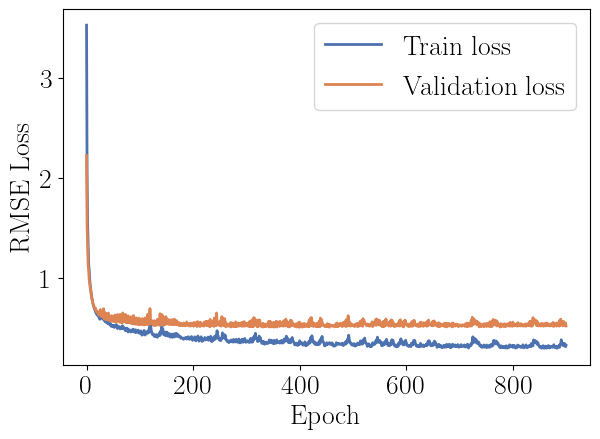

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.3174, R2: 0.9385
Validation Loss: 0.5056, R2: 0.8340
Test Loss: 0.5063, R2: 0.8492


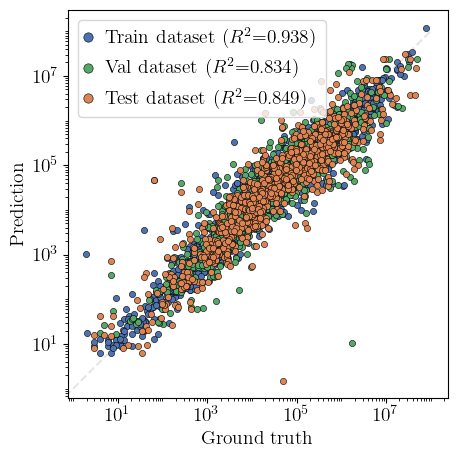

In [4]:
trainer.plot_truth_pred()

Train Loss: 0.0586, R2: 0.9642
Test Loss: 0.2401, R2: 0.8587


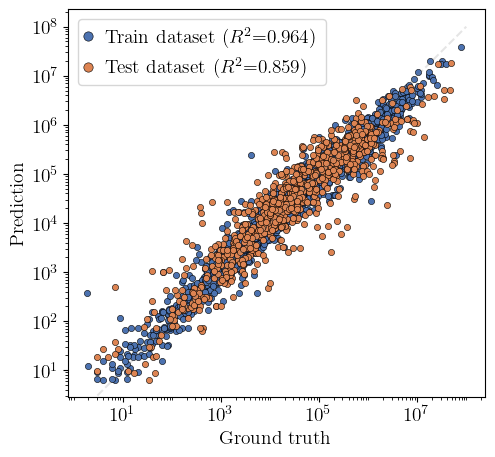

In [5]:
trainer.plot_truth_pred_sklearn(model_name='rf')

### Permutation feature importance

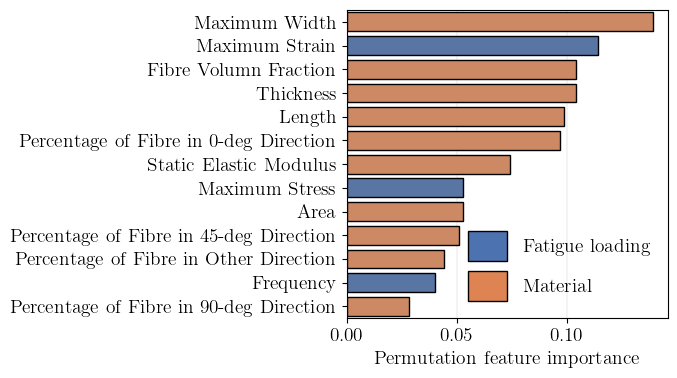

In [6]:
trainer.plot_feature_importance()

### Partial dependence

Calculate PDP:  Percentage of Fibre in 0-deg Direction
Calculate PDP:  Percentage of Fibre in 45-deg Direction
Calculate PDP:  Percentage of Fibre in 90-deg Direction
Calculate PDP:  Percentage of Fibre in Other Direction
Calculate PDP:  Fibre Volumn Fraction
Calculate PDP:  Thickness
Calculate PDP:  Maximum Width
Calculate PDP:  Area
Calculate PDP:  Length
Calculate PDP:  Maximum Strain
Calculate PDP:  Maximum Stress
Calculate PDP:  Frequency
Calculate PDP:  Static Elastic Modulus


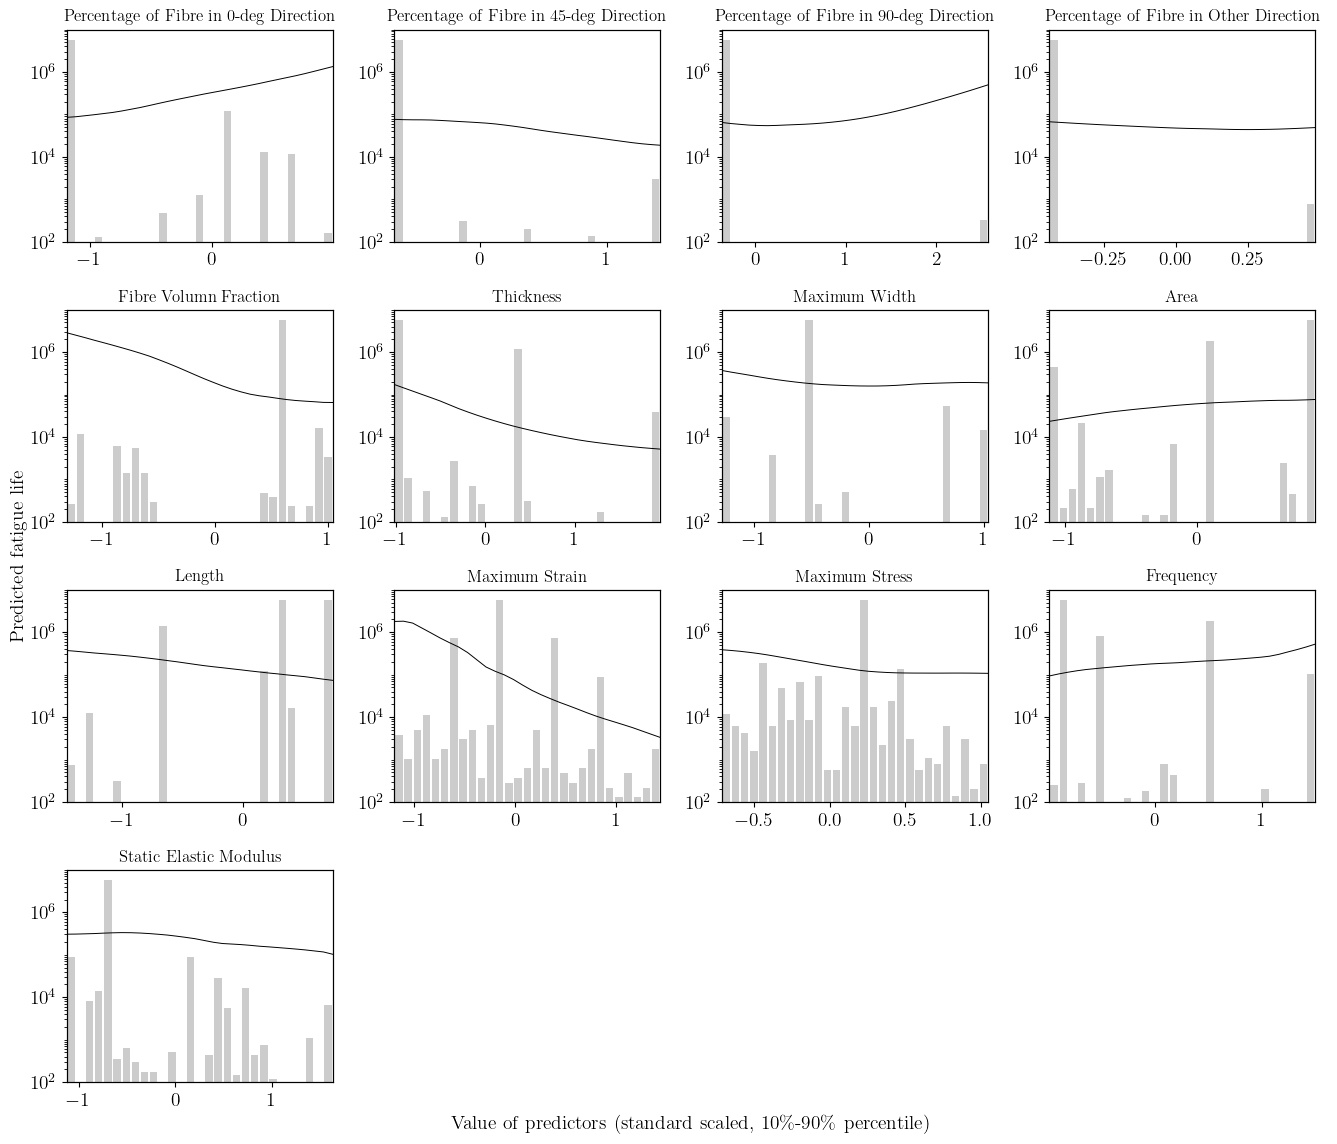

In [7]:
trainer.plot_partial_dependence()

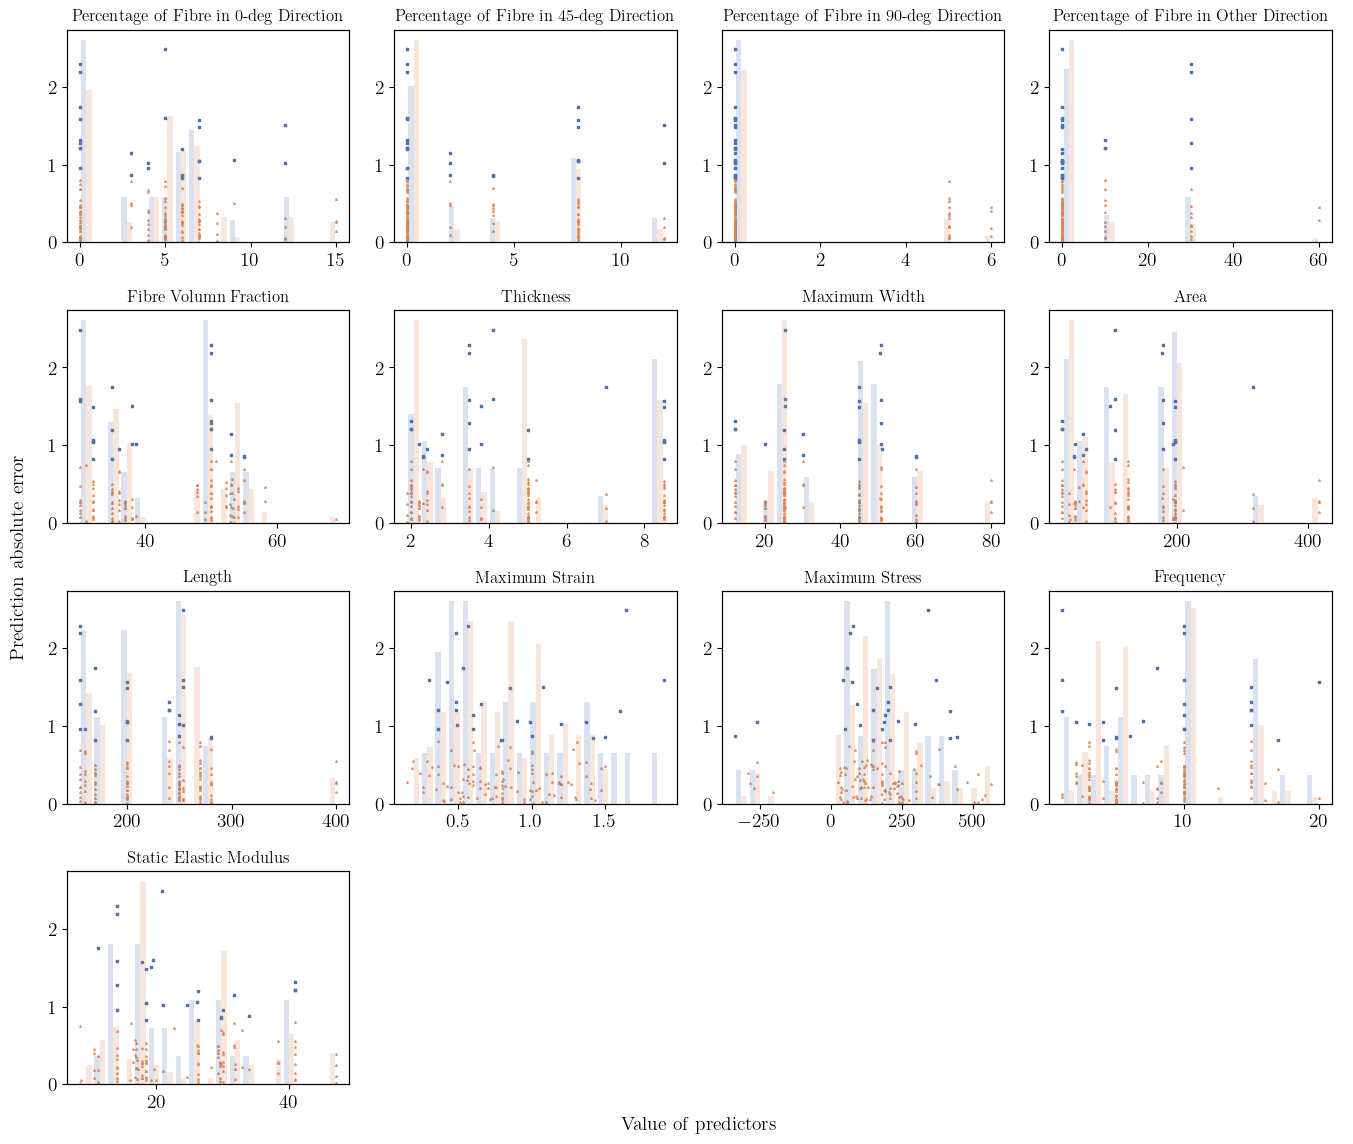

In [8]:
trainer.plot_partial_err()